# 02_group_comparison

## Setup

In [56]:
# Import necessary libraries and version check (couldn't use the latest scipy due to import error)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import statsmodels.api as sm
from statsmodels.formula.api import ols

sns.set(style='whitegrid')

print("✅ pandas:", pd.__version__)
print("✅ numpy:", np.__version__)
print("✅ seaborn:", sns.__version__)
print("✅ matplotlib:", plt.matplotlib.__version__)
print("✅ scipy:", scipy.__version__)
print("✅ statsmodels:", sm.__version__)


✅ pandas: 2.2.2
✅ numpy: 1.26.4
✅ seaborn: 0.12.2
✅ matplotlib: 3.8.4
✅ scipy: 1.12.0
✅ statsmodels: 0.14.4


In [10]:
# Load cleaned dataset
df = pd.read_csv('../data/cleaned/cleaned_bigfive_v1.csv')

In [46]:
# Traits list 
traits = ['Openness', 'Conscientiousness', 'Extraversion', 'Agreeableness', 'Neuroticism']

# [Optional] Sampling (same random_state as 01_univariate_EDA)
df_sample = df.sample(n=5000, random_state=42)

## Grouping by Countries

### Group Definitions

In [15]:
df['country'].value_counts().head(10)

country
US      300435
GB       43406
CA       38329
AU       30297
DE       10892
IN        9846
PH        9466
MX        8273
NONE      8184
NO        7133
Name: count, dtype: int64

In [43]:
df_sample['country'].value_counts().head(10)

country
US      2530
GB       355
CA       316
AU       237
MX        82
DE        82
NL        72
PH        68
IN        67
NONE      65
Name: count, dtype: int64

In [47]:
df_sample['country'].unique()

array(['US', 'DK', 'GB', 'NZ', 'CA', 'MX', 'NONE', 'BR', 'VN', 'ES', 'SE',
       'PH', 'ID', 'AE', 'AU', 'FR', 'NO', 'MY', 'NL', 'SG', 'KH', 'KE',
       'DE', 'BE', 'UA', 'RU', 'HK', 'IN', 'RS', 'PK', 'HR', 'AR', 'ZA',
       'FI', 'MM', 'KR', 'CL', 'BH', 'AT', 'BG', 'UY', 'TR', 'CZ', 'IE',
       'IT', 'RO', 'PL', 'CH', 'TH', 'PE', 'KG', 'GH', 'GR', 'BA', 'IL',
       'CO', 'MT', 'IQ', 'PR', 'EC', 'TW', 'HU', 'JM', 'ME', 'JP', 'VE',
       'MG', 'CN', 'KZ', 'AL', 'JO', 'PT', 'BO', 'TT', 'CY', 'MK', 'SK',
       'GT', 'MV', 'CR', 'GP', 'KW', 'SA', 'IR', 'LK', 'GG', 'NP', 'EE',
       'BM', 'LU', 'IS', 'TN', 'SI', 'LT', 'BN', 'PY', 'BW', 'OM', 'DO',
       'YE', 'JE', 'PG', 'AX', 'QA', 'BY', 'TZ', 'DM', 'EG', 'LB', 'NG',
       'SN'], dtype=object)

#### Creating groups by continent

In [48]:
north_america = ['US', 'CA', 'MX', 'PR', 'GP', 'BM', 'DM', 'JM', 'TT', 'GT', 'CR', 'DO']
south_america = ['BR', 'AR', 'CL', 'UY', 'CO', 'PE', 'VE', 'EC', 'PY']
europe = ['GB', 'IE', 'DK', 'SE', 'NO', 'FI', 'DE', 'FR', 'NL', 'BE', 'LU',
          'CH', 'AT', 'BG', 'RO', 'PL', 'PT', 'ES', 'IT', 'GR', 'UA', 'RS',
          'HR', 'BA', 'CY', 'MK', 'ME', 'HU', 'SK', 'CZ', 'SI', 'LT', 'EE',
          'IS', 'GG', 'JE', 'AX', 'MT', 'BY']

asia = ['IN', 'CN', 'JP', 'KR', 'SG', 'MY', 'VN', 'KH', 'ID', 'PH', 'PK',
        'TH', 'MV', 'BN', 'LK', 'NP', 'TW', 'IR', 'IQ', 'SA', 'KW', 'QA',
        'AE', 'OM', 'KZ', 'KG', 'MM', 'HK', 'IL', 'JO', 'LB', 'BH', 'YE', 'PG']

def map_region(row):
    if row['country'] in north_america:
        return 'NA'
    elif row['country'] in south_america:
        return 'SA'
    elif row['country'] in europe:
        return 'EU'
    elif row['country'] in asia:
        return 'AS'
    else:
        return 'Other'
    
df_sample['continent'] = df_sample.apply(map_region, axis = 1)
print(df_sample['continent'].value_counts())

continent
NA       2949
EU       1047
AS        445
Other     430
SA        129
Name: count, dtype: int64


In [49]:
#Checking what countries are in Other
print(df_sample[df_sample['continent'] == 'Other']['country'].value_counts())


country
AU      237
NONE     65
NZ       53
ZA       23
RU       22
TR       13
KE        4
AL        3
GH        2
TZ        1
NG        1
EG        1
MG        1
BW        1
TN        1
BO        1
SN        1
Name: count, dtype: int64


In [ ]:
# Upon Checking what's in Other:
# Oceania region has enough N => a separate group.
# African N is small => keep them in 'other'
# Keep tiny countires (KE, AL, GH, TZ, NG, EG, MG, BW, TN, BO, SN), and Eurasian countries (Russia and Turkey) in 'other' group due to small N.

#### Updated Grouping by Continent

In [50]:

north_america = ['US', 'CA', 'MX', 'PR', 'GP', 'BM', 'DM', 'JM', 'TT', 'GT', 'CR', 'DO']
south_america = ['BR', 'AR', 'CL', 'UY', 'CO', 'PE', 'VE', 'EC', 'PY']
europe = ['GB', 'IE', 'DK', 'SE', 'NO', 'FI', 'DE', 'FR', 'NL', 'BE', 'LU',
          'CH', 'AT', 'BG', 'RO', 'PL', 'PT', 'ES', 'IT', 'GR', 'UA', 'RS',
          'HR', 'BA', 'CY', 'MK', 'ME', 'HU', 'SK', 'CZ', 'SI', 'LT', 'EE',
          'IS', 'GG', 'JE', 'AX', 'MT', 'BY']

asia = ['IN', 'CN', 'JP', 'KR', 'SG', 'MY', 'VN', 'KH', 'ID', 'PH', 'PK',
        'TH', 'MV', 'BN', 'LK', 'NP', 'TW', 'IR', 'IQ', 'SA', 'KW', 'QA',
        'AE', 'OM', 'KZ', 'KG', 'MM', 'HK', 'IL', 'JO', 'LB', 'BH', 'YE', 'PG']
oceania = ['AU', 'NZ']

def map_region(row):
    if row['country'] in north_america:
        return 'NA'
    elif row['country'] in south_america:
        return 'SA'
    elif row['country'] in europe:
        return 'EU'
    elif row['country'] in asia:
        return 'AS'
    elif row['country'] in oceania:
        return 'OC'
    else:
        return 'Other'

# Dropping NONE rows
df_sample = df_sample[df_sample['country'] != 'NONE']
# Applying 'map_region'
df_sample['continent'] = df_sample.apply(map_region, axis = 1)
# Dropping 'Other'
df_sample = df_sample[df_sample['continent'] != 'Other']
print(df_sample['continent'].value_counts())


continent
NA    2949
EU    1047
AS     445
OC     290
SA     129
Name: count, dtype: int64


In [ ]:
#“For exploratory comparison, I used a random sample of 5,000 rows from the cleaned dataset. 
# Region groups were defined based on the country distribution in this sample. 
# Final analyses will be repeated on the full dataset with the same region definitions.”

### Statistical Tests

#### Group-wise Trait Descriptive Stats

In [53]:
grouped_continent = df_sample.groupby('continent')[traits].agg(['mean', 'std', 'count'])
grouped_continent.round(2)

Openness             Conscientiousness             Extraversion  \
              mean   std count              mean   std count         mean   
continent                                                                   
AS            3.21  0.39   445              3.11  0.39   445         3.05   
EU            3.33  0.34  1047              3.10  0.38  1047         3.02   
NA            3.32  0.36  2949              3.17  0.36  2949         3.03   
OC            3.31  0.36   290              3.10  0.37   290         3.04   
SA            3.35  0.38   129              3.19  0.35   129         3.04   

                      Agreeableness             Neuroticism              
            std count          mean   std count        mean   std count  
continent                                                                
AS         0.37   445          3.27  0.37   445        2.87  0.65   445  
EU         0.32  1047          3.13  0.32  1047        2.93  0.63  1047  
NA         0.33  2949          3.17  0.33  2949        2.98  0.63  2949  
OC         0.31   290          3.19  0.32   290        3.01  0.60   290  
SA         0.35   129          3.18  0.39   129        2.85  0.75   129

#### One-way ANOVA

In [69]:
# Q: Does the mean score of each Big Five trait show difference across my continent groups?

# EXAMPLE: Openness by Continent
# Openness means by continent
print(df_sample.groupby('continent')['Openness'].mean().round(2))
# ANOVA table
model = ols('Openness ~ C(continent)', data=df_sample).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

anova_table

continent
AS    3.21
EU    3.33
NA    3.32
OC    3.31
SA    3.35
Name: Openness, dtype: float64


,sum_sq,df,F,PR(>F)
C(continent),5.952625,4.0,11.416947,3.184313e-09
Residual,632.831079,4855.0,NaN,NaN


In [ ]:
# For all traits: run one-way ANOVA for a trait across continents. 
# Returns group means and ANOVA table
def oneway_anova(df, trait, group='continent'):
    """
    Parameters:
        df : DataFrame
        trait : str, name of the trait column
        group : str, grouping column (default: 'continent')
    """
    print(f"\n### ANOVA for {trait} by {group} ###\n")
    
    # Group means
    means = df.groupby(group)[trait].mean().round(2)
    print("Group means:\n", means)
    
    # OLS model
    model = ols(f'{trait} ~ C({group})', data=df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    
    print("\nANOVA table:\n", anova_table)
    return anova_table

for trait in traits:
    oneway_anova(df_sample, trait)


### ANOVA for Openness by continent ###

Group means:
 continent
AS    3.21
EU    3.33
NA    3.32
OC    3.31
SA    3.35
Name: Openness, dtype: float64

ANOVA table:
                   sum_sq      df          F        PR(>F)
C(continent)    5.952625     4.0  11.416947  3.184313e-09
Residual      632.831079  4855.0        NaN           NaN

### ANOVA for Conscientiousness by continent ###

Group means:
 continent
AS    3.11
EU    3.10
NA    3.17
OC    3.10
SA    3.19
Name: Conscientiousness, dtype: float64

ANOVA table:
                   sum_sq      df         F        PR(>F)
C(continent)    4.792877     4.0  8.793037  4.531262e-07
Residual      661.586497  4855.0       NaN           NaN

### ANOVA for Extraversion by continent ###

Group means:
 continent
AS    3.05
EU    3.02
NA    3.03
OC    3.04
SA    3.04
Name: Extraversion, dtype: float64

ANOVA table:
                   sum_sq      df         F   PR(>F)
C(continent)    0.399612     4.0  0.916556  0.45315
Residual      529.186183

In [ ]:
# One-way ANOVAs showed that mean Openness, Conscientiousness, Agreeableness, and Neuroticism scores differed significantly across continents (all ps < .001). 
# Extraversion did not differ significantly (p = .45).

#### Tukey's HSD


In [ ]:
#Import Tukey HSD tool
from statsmodels.stats.multicomp import pairwise_tukeyhsd

#Run Tukey HSD: pairwise_tukeyhsd(endog=..., groups=..., alpha=...)
tukey = pairwise_tukeyhsd(endog=df_sample['Openness'], #DV scores 
                          groups=df_sample['continent'], #Group factor 
                          alpha=0.05) #Significance level

print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    AS     EU   0.1256    0.0  0.0698 0.1813   True
    AS     NA   0.1176    0.0  0.0675 0.1677   True
    AS     OC   0.1008  0.002  0.0265 0.1752   True
    AS     SA   0.1427 0.0007  0.0442 0.2412   True
    EU     NA   -0.008 0.9727 -0.0434 0.0275  False
    EU     OC  -0.0247 0.8403 -0.0901 0.0406  False
    EU     SA   0.0171 0.9866 -0.0748  0.109  False
    NA     OC  -0.0168 0.9435 -0.0774 0.0439  False
    NA     SA   0.0251 0.9384 -0.0635 0.1137  False
    OC     SA   0.0419  0.809 -0.0624 0.1461  False
---------------------------------------------------


In [ ]:
# Output Interpretation
# group1, group 2: the pair of regions being compared
# meandiff: mean difference (group2 - group1)
# p-adj: adjusted p-value (for multiple comparisons)
# lower, upper: 95% confidence interval for the mean difference
# reject: True means significant (reject H0: the means differ significantly)

# Tukey HSD post-hoc tests showed that participants from Asia had significantly lower Openness scores than all other continents (all p < .01). 
# No other pairwise differences were significant.


In [76]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

#Significant traits from the one-way ANOVA
significant_traits = ['Openness', 'Conscientiousness', 'Agreeableness', 'Neuroticism']

#Loop
for trait in significant_traits:
    print(f'\n### Tukey HSD for {trait} by continent ###\n')
    tukey = pairwise_tukeyhsd(
        endog = df_sample[trait],
        groups = df_sample['continent'],
        alpha = 0.5
    )
    print(tukey)



### Tukey HSD for Openness by continent ###

Multiple Comparison of Means - Tukey HSD, FWER=0.50
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    AS     EU   0.1256    0.0  0.0929 0.1582   True
    AS     NA   0.1176    0.0  0.0883 0.1469   True
    AS     OC   0.1008  0.002  0.0573 0.1443   True
    AS     SA   0.1427 0.0007  0.0851 0.2003   True
    EU     NA   -0.008 0.9727 -0.0287 0.0127  False
    EU     OC  -0.0247 0.8403  -0.063 0.0135  False
    EU     SA   0.0171 0.9866 -0.0366 0.0709  False
    NA     OC  -0.0168 0.9435 -0.0522 0.0187  False
    NA     SA   0.0251 0.9384 -0.0267 0.0769  False
    OC     SA   0.0419  0.809 -0.0191 0.1028  False
---------------------------------------------------

### Tukey HSD for Conscientiousness by continent ###

Multiple Comparison of Means - Tukey HSD, FWER=0.50 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    AS     E

In [ ]:
# Tukey HSD Interpretations
# 1. Openness
    # All significant differences involve Asia vs every other continent.
    # EU, NA, OC, SA → all higher than Asia.
    # No other pairs differ (EU vs NA, EU vs SA, NA vs OC etc.).
# Post-hoc Tukey tests confirmed that Openness was significantly lower in Asia compared to all other continents (all p < .01). 
# No other pairwise differences were significant.

# 2. Conscientiousness
    # AS is lower than NA by ~0.056 → significant (p = .024)
    # EU is lower than NA by ~0.066 → highly significant (p < .001)
    # A few pairs (e.g., EU vs SA) pop up too.
    # OC drifts slightly lower than NA (borderline difference)
# Conscientiousness was significantly higher in North America than in Asia, Europe, and Oceania(p < .05). 
# Other pairwise differences were mostly non-significant.

# 3. Agreeableness
    # Asia is significantly lower than everyone else → big negative mean diffs.
    # EU vs NA → tiny but significant (+0.0337), so Europe slightly more agreeable than North America.
    # EU vs OC → similar direction but CI hits zero → borderline.
    # Other pairs → no meaningful difference.  
    # Asia showed significantly lower Agreeableness than all other regions (p < .05). 
    # Europe was slightly higher than North America (p ≈ .04).

# 4. Neuroticism:
    # Asia vs NA: significant → NA is more Neurotic than Asia. (p< .0063)
    # Asia vs OC: significant → OC is more Neurotic than Asia. (p< .0346)
    # Pairwise comparisons showed that North America and Oceania had significantly higher Neuroticism than Asia (p < .05). 
    # The Asia–Europe difference was not significant (p = .465) despite a marginal CI.


### Visualizations

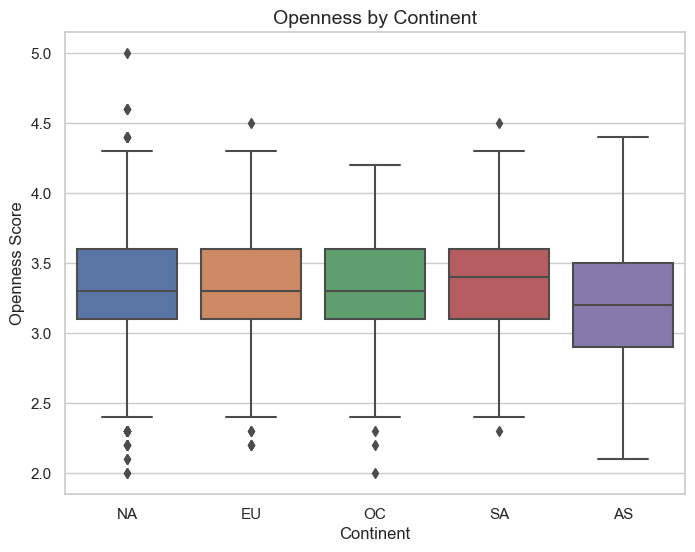

In [78]:
plt.figure(figsize=(8,6))

sns.boxplot(
    x='continent',
    y='Openness',
    data=df_sample
)

plt.title('Openness by Continent', fontsize=14)
plt.xlabel('Continent', fontsize=12)
plt.ylabel('Openness Score', fontsize=12)

plt.show()
